# Plotting Country Data - part 1

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import requests
import matplotlib
import matplotlib.pyplot as pp
import mplcursors
import ipywidgets as widgets
from ipywidgets import IntRangeSlider, SelectMultiple


%matplotlib inline

In [3]:
#load country data

data = pd.read_csv("Big Data Challenge_ Data and Challenge Statements/Data/country_data_by_quarter_elec_mob_strin.csv")
data

,CountryName,Year,Month,Quarter,max_StIn,min_StIn,max_StInDis,min_StInDis,ConfirmedCases,ConfirmedDeaths,avg_residential_mobility_from_baseline,avg_workplace_mobility_from_baseline,TWh,Date,fake day,Date_Est
0,Austria,2020,April,1,85.19,85.19,85.19,85.19,12640.0,243.0,21.250000,-55.625000,4.556000,2020 April 4,4,2020-04-04
1,Austria,2020,April,2,85.19,81.48,85.19,81.48,14370.0,393.0,20.500000,-57.125000,4.556000,2020 April 11,11,2020-04-11
2,Austria,2020,April,3,81.48,78.70,81.48,78.70,14924.0,494.0,16.714286,-46.142857,4.556000,2020 April 18,18,2020-04-18
3,Austria,2020,April,4,78.70,78.70,78.70,78.70,15364.0,580.0,14.571429,-42.428571,4.556000,2020 April 25,25,2020-04-25
4,Austria,2020,August,1,31.48,31.48,31.48,31.48,21819.0,720.0,0.750000,-27.500000,NaN,2020 August 4,4,2020-08-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,United Kingdom,2019,August,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.742809,2019 August 25,25,2019-08-25
3641,United Kingdom,2019,September,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.870830,2019 September 25,25,2019-09-25
3642,United Kingdom,2019,October,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.767437,2019 October 25,25,2019-10-25
3643,United Kingdom,2019,November,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.566669,2019 November 25,25,2019-11-25


## Plotting by country and feature

This probably looks too clunky. Could modify the list in plot_all_countries function though to only include a handfull of countries that we find most interesting. 

In [4]:
#input country name and feature (e.g. max_StInDis)

def plotcountry(country, feature):
    df = data[data.CountryName == country].sort_values(by = ['Date_Est'], ascending = True)
    pp.plot(df['Date_Est'], df[feature], label=country)
    

In [9]:
def plot_all_countries(feature):
    #create list of all relevant countries
    Europe = ['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia', 'Ireland', 'Greece', 'Spain', 'France', 
              'Croatia', 'Italy', 'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Netherlands', 'Austria', 
              'Poland', 'Portugal', 'Romania','Slovenia', 'Slovak Republic', 'Finland', 'Sweden', 'United Kingdom']
    
    pp.figure(figsize=(12,2.5))
    
    for country in Europe:
        plotcountry(country, feature)
        
    pp.legend()
        

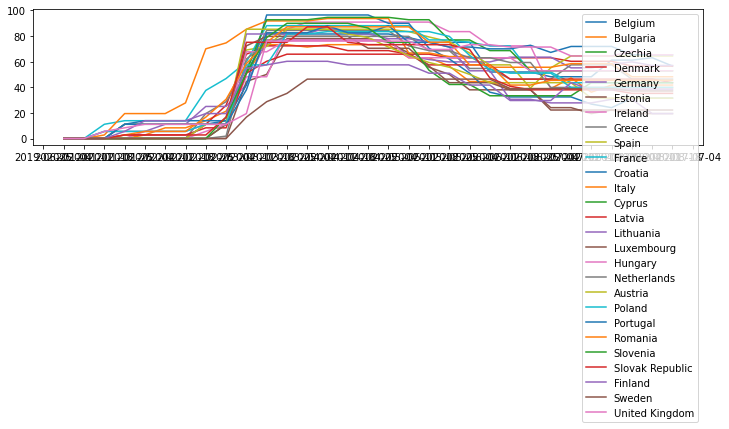

In [10]:
plot_all_countries('max_StInDis')

In [75]:
data.TWh.min()

0.154

# Potential Plot for Final Presentation

The plot needs some visual improvements (add things like title, change axis label sizes, etc). The creation of the plot is defined in plot_2features, and then implemented in the cell below. Once we figure out a color scheme we can change it so that imputing feature1_color and feature2_color are no longer options and the color is automatically chosen in the two subplots.
It might also be nice to add some smoothing to make it visually look less clunky, but not absolutely necessary

In [91]:
def plot_2features(country, feature1, feature2, feature1_color = 'red', feature2_color = 'blue'):
    data2 = data[data.CountryName == country].sort_values(by = ['Date_Est'], ascending = True)
    df = data2.query('Date_Est> "2020-01-01"')
    df.set_index(['Date_Est'], inplace = True)
    
    ymax = {'max_StIn': 100, 'min_StIn': 100, 'max_StInDis': 100, 'min_StInDis': 100, 'ConfirmedCases':365000, 'ConfirmedDeaths': 42000, 
            'avg_residential_mobility_from_baseline': 100, 'avg_workplace_mobility_from_baseline': -100, 'TWh': 53}
    ymin = {'max_StIn': 0, 'min_StIn': 0, 'max_StInDis': 0, 'min_StInDis': 0, 'ConfirmedCases':0, 'ConfirmedDeaths': 0, 
            'avg_residential_mobility_from_baseline': 0, 'avg_workplace_mobility_from_baseline': 0, 'TWh': 0}
    
    label = {'max_StInDis': 'Maximum Stringency Index During Given Week', 'min_StInDis': 'Minimum Stringency Index During Given Week', 
             'ConfirmedCases': 'Total Cumulative Confirmed Cases', 'ConfirmedDeaths': 'Total Cumulative Confirmed Deaths', 
             'avg_residential_mobility_from_baseline': 'Residental Mobility Percent Change from Baseline', 
             'avg_workplace_mobility_from_baseline': 'Workplace Mobility Percent Change from Baseline', 'TWh': 'Total Monthly Electricity Usage (TWh)'}
    
    fig, ax1 = pp.subplots(figsize = (15, 10))

    if feature1 == 'avg_workplace_mobility_from_baseline':
        ax1.invert_yaxis()
    color = feature1_color # once we've decided on a color scheme put the final color choice for feature1 here
    ax1.set_xlabel('Date')
    ax1.set_ylabel(label[feature1], color=color)
    ax1.plot(df[feature1], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim([ymin[feature1],ymax[feature1]])
    fig.autofmt_xdate()

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    if feature2 == 'avg_workplace_mobility_from_baseline':
        ax2.invert_yaxis()

    color = feature2_color # once we've decided on a color scheme put the final color choice for feature2 here and 
                            # then remove feature1_color and feature2_color from the args listed in the definition of the function
    ax2.set_ylabel(label[feature2], color=color)  # we already handled the x-label with ax1
    ax2.plot(df[feature2], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim([ymin[feature2],ymax[feature2]])

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    pp.show()
    


In [84]:
data.columns

Index(['CountryName', 'Year', 'Month', 'Quarter', 'max_StIn', 'min_StIn',
       'max_StInDis', 'min_StInDis', 'ConfirmedCases', 'ConfirmedDeaths',
       'avg_residential_mobility_from_baseline',
       'avg_workplace_mobility_from_baseline', 'TWh', 'Date', 'fake day',
       'Date_Est'],
      dtype='object')

In [95]:
#plot_volumes('left_Whole_hippocampus')
# Add a slider

Europe = ['Belgium', 'Bulgaria', 'Czech Republic', 'Denmark', 'Germany', 'Estonia', 'Ireland', 'Greece', 'Spain', 'France', 
              'Croatia', 'Italy', 'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Netherlands', 'Austria', 
              'Poland', 'Portugal', 'Romania','Slovenia', 'Slovak Republic', 'Finland', 'Sweden', 'United Kingdom']
Features = [('Maximum Weekly Stringency Index', 'max_StInDis'), ('Minimum Weekly Stringency Index', 'min_StInDis'), ('Confirmed Cases','ConfirmedCases'), 
            ('Confirmed Deaths', 'ConfirmedDeaths'),('Change in Residential Mobility', 'avg_residential_mobility_from_baseline'),('Change in Workplace Mobility','avg_workplace_mobility_from_baseline'),('Electricity Usage', 'TWh')]

country_select = widgets.Dropdown(options = Europe, description = 'Country')
feature1_select = widgets.Dropdown(options = Features, description = 'Feature 1')
feature2_select = widgets.Dropdown(options = Features, description = 'Feature 2')

# Hook it up to interact
from ipywidgets import interact
interact(
    plot_2features,
    country = country_select,
    feature1 = feature1_select,
    feature2 = feature2_select
)

interactive(children=(Dropdown(description='Country', options=('Belgium', 'Bulgaria', 'Czech Republic', 'Denma…

<function __main__.plot_2features(country, feature1, feature2, feature1_color='red', feature2_color='blue')>